In [3]:
# the initial attempts with the existing code were not successful
# retry by reimplementing the canny edge detection

import pandas as pd
import pathlib
import numpy as np
from skimage import color, io
from skimage.transform import hough_circle, hough_circle_peaks, rotate
from skimage.feature import canny
from skimage.draw import circle_perimeter, disk
from skimage.util import img_as_ubyte
from matplotlib import pyplot as plt

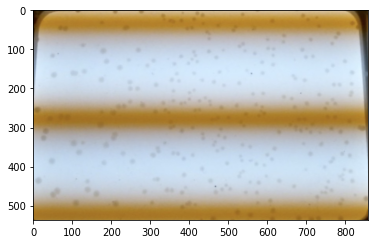

In [59]:
path = pathlib.Path('../data/webcam_test2/Photo on 3-9-23 at 1.44 PM_crop.jpg')
img = io.imread(path)

plt.imshow(img)

(-0.5, 857.5, 536.5, -0.5)

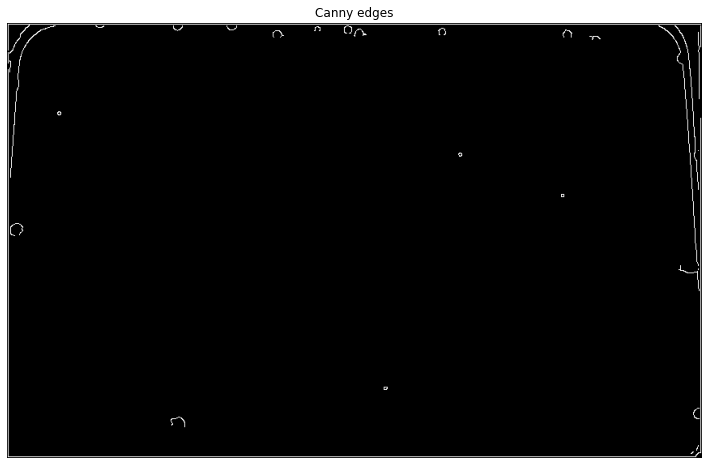

In [71]:
# convert to grayscale
img_gray = color.rgb2gray(img)

# apply canny edge detection
edges = canny(
    img_gray, 
              #sigma=1.5, 
              use_quantiles=True,
              )

# display the results
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 8))
ax.imshow(edges, cmap=plt.cm.gray)
ax.set_title('Canny edges')
ax.axis('off')


Found 198 circles
Min accumulator value: 0.6000000000000002


(-0.5, 857.5, 536.5, -0.5)

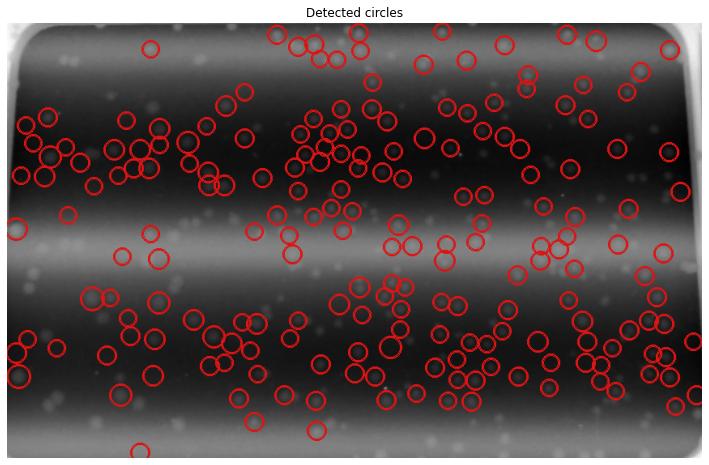

In [70]:
# apply hough transform
hough_radii = np.arange(4, 15, 1)
hough_res = hough_circle(edges, hough_radii)

# select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(
    hough_res, 
    hough_radii, 
    total_num_peaks=384,
    min_xdistance=15,
    min_ydistance=15,
    )

# only keep accums above a certain threshold
accums_threshold = 0.6
cx = cx[accums > accums_threshold]
cy = cy[accums > accums_threshold]
radii = radii[accums > accums_threshold]
accums = accums[accums > accums_threshold]


print(f'Found {len(radii)} circles')
print(f'Min accumulator value: {accums.min()}')

# draw them
def draw_colonies(cx: list, cy: list, r: list, image: np.array):
    # invert the image
    image = 255 - image
    image = np.int16(
        np.interp(image, (image.min(), image.max()), (0, 255))
    )  # this rescales the image to be between 0 and 255
    cimage = color.gray2rgb(image)
    for center_y, center_x, rad in zip(cy, cx, r):
        # to make them a bit bolder
        for dr in range(rad, rad + 3):
            circy, circx = circle_perimeter(center_y, center_x, dr+5, shape=cimage.shape)
            cimage[circy, circx] = (220, 20, 20)

    return cimage

image = draw_colonies(cx, cy, radii, img_gray)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 8))
ax.imshow(image)
ax.set_title('Detected circles')
ax.axis('off')

    